In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
dataset = pd.read_csv('ratings.csv')

In [11]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [12]:
dataset.shape

(981756, 3)

In [13]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [14]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [15]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


grouping user

In [17]:
datasetGroup = dataset.groupby('user_id')

In [18]:
datasetGroup.get_group(19643).head()

,book_id,user_id,rating
99136,992,19643,5
103441,1035,19643,5
112731,1128,19643,5
149324,1494,19643,5
154718,1548,19643,5


In [16]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [ ]:
n_books = len(dataset.book_id.unique())
n_books

10000

### **Creating dot product model**

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

In [ ]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Book-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Book-Embedding (Embedding)     (None, 1, 5)         50005       ['Book-Input[0][0]']             
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         267125      ['User-Input[0][0]']             
                                                                                              

In [ ]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
6136/6136 [==============================] - 35s 6ms/step - loss: 14.6000
Epoch 2/10
6136/6136 [==============================] - 35s 6ms/step - loss: 6.4701
Epoch 3/10
6136/6136 [==============================] - 34s 6ms/step - loss: 2.3762
Epoch 4/10
6136/6136 [==============================] - 35s 6ms/step - loss: 1.4010
Epoch 5/10
6136/6136 [==============================] - 35s 6ms/step - loss: 1.0651
Epoch 6/10
6136/6136 [==============================] - 34s 6ms/step - loss: 0.9060
Epoch 7/10
6136/6136 [==============================] - 35s 6ms/step - loss: 0.8170
Epoch 8/10
6136/6136 [==============================] - 35s 6ms/step - loss: 0.7623
Epoch 9/10
6136/6136 [==============================] - 34s 6ms/step - loss: 0.7270
Epoch 10/10
6136/6136 [==============================] - 33s 5ms/step - loss: 0.7030


In [ ]:
model.save('regression_model.h5')

Text(0, 0.5, 'Training Error')

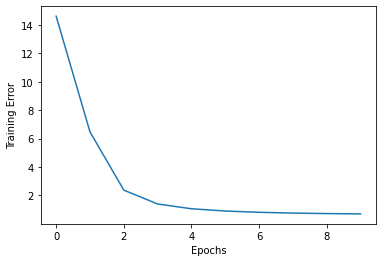

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

**load regresion model**

In [ ]:
from keras.models import load_model

model = load_model('regression_model.h5')

In [ ]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 18s 3ms/step - loss: 0.9453


0.9452970623970032

In [ ]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 145ms/step
[4.995708] 5
[3.9467487] 4
[3.957634] 3
[4.3424764] 5
[3.4999082] 3
[4.116438] 3
[3.65414] 3
[4.860422] 4
[4.1400423] 3
[4.212046] 5


[None, None, None, None, None, None, None, None, None, None]

## **Creating Neural Network**

In [ ]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)

In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Book-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Book-Embedding (Embedding)     (None, 1, 5)         50005       ['Book-Input[0][0]']             
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         267125      ['User-Input[0][0]']             
                                                                                            

In [ ]:
history = model2.fit([train.user_id, train.book_id], train.rating, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
6136/6136 [==============================] - 47s 7ms/step - loss: 0.8685
Epoch 2/10
6136/6136 [==============================] - 42s 7ms/step - loss: 0.6811
Epoch 3/10
6136/6136 [==============================] - 43s 7ms/step - loss: 0.6529
Epoch 4/10
6136/6136 [==============================] - 43s 7ms/step - loss: 0.6249
Epoch 5/10
6136/6136 [==============================] - 41s 7ms/step - loss: 0.6014
Epoch 6/10
6136/6136 [==============================] - 43s 7ms/step - loss: 0.5770
Epoch 7/10
6136/6136 [==============================] - 45s 7ms/step - loss: 0.5532
Epoch 8/10
6136/6136 [==============================] - 41s 7ms/step - loss: 0.5329
Epoch 9/10
6136/6136 [==============================] - 39s 6ms/step - loss: 0.5160
Epoch 10/10
6136/6136 [==============================] - 41s 7ms/step - loss: 0.5016


In [ ]:
model2.save('regression_model2.h5')

Text(0, 0.5, 'Training Error')

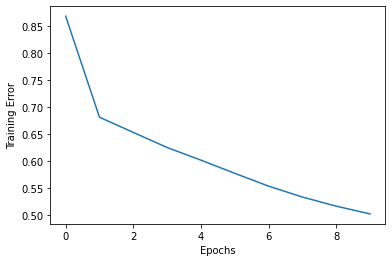

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

**load regresion model2**

In [ ]:
from keras.models import load_model

model2 = load_model('regression_model2.h5')

In [ ]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 10s 2ms/step - loss: 0.7676


0.767555832862854

In [ ]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 162ms/step
[5.0481257] 5
[3.8139486] 4
[3.8580558] 3
[4.232823] 5
[3.573846] 3
[4.150357] 3
[3.830552] 3
[5.0513906] 4
[4.347632] 3
[4.558014] 5


[None, None, None, None, None, None, None, None, None, None]

## **Visualizing Embeddings**

In [ ]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
book_em_weights[:5]

array([[-0.00877762, -0.04527975,  0.01392416,  0.03000237, -0.00234573],
       [-0.46817866, -1.4794252 ,  1.4476618 ,  1.3800142 , -1.3215581 ],
       [-0.9694736 , -1.2653087 ,  1.4025832 ,  1.3164337 , -1.1283457 ],
       [-0.5510109 , -0.9662176 ,  0.82039285,  1.0086417 , -1.135333  ],
       [-1.1211478 , -1.2611189 ,  1.4274627 ,  1.2880539 , -1.1712817 ]],
      dtype=float32)

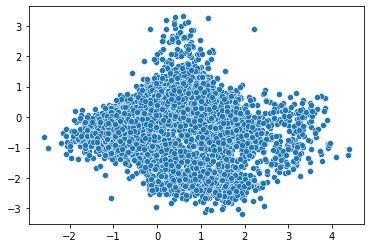

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

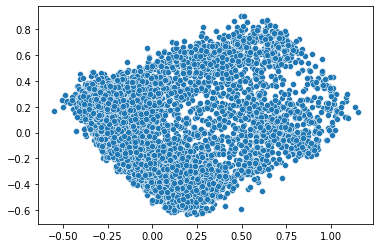

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.011s...
[t-SNE] Computed neighbors for 10001 samples in 0.915s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.032528
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.403549
[t-SNE] KL

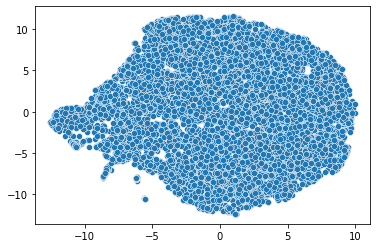

In [ ]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

## **Making Recommendations**

In [ ]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [ ]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [ ]:
predictions = model.predict([user, book_data])

313/313 [==============================] - 1s 1ms/step


In [ ]:
predictions

array([[3.572003 ],
       [3.3767319],
       [2.491459 ],
       ...,
       [3.5691762],
       [3.4962397],
       [3.780531 ]], dtype=float32)

In [ ]:
predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8258, 4942, 7843, 8998, 7638])

In [ ]:
# print predicted scores
predictions[recommended_book_ids]

array([4.7752986, 4.7247677, 4.7179785, 4.672075 , 4.5764503],
      dtype=float32)

In [ ]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
4941,4942,48467,48467,1046530,60,374530637,9.780375e+12,Flannery O'Connor,1952.0,Wise Blood,...,18053,20326,1675,511,1451,4492,7411,6461,https://images.gr-assets.com/books/1389629799m...,https://images.gr-assets.com/books/1389629799s...
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,...,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7842,7843,17182421,17182421,21762912,49,778315339,9.780778e+12,Jason Mott,2013.0,The Returned,...,11449,13269,2452,581,2122,5100,3798,1668,https://images.gr-assets.com/books/1372089735m...,https://images.gr-assets.com/books/1372089735s...
8257,8258,18594594,18594594,26341000,41,345547497,9.780346e+12,Karin Slaughter,2014.0,Cop Town,...,10660,13997,1704,274,780,3299,5612,4032,https://images.gr-assets.com/books/1384822680m...,https://images.gr-assets.com/books/1384822680s...
8997,8998,292740,292740,2457130,37,2266071289,9.782266e+12,Lorenzo Carcaterra,1995.0,Sleepers,...,9560,10772,553,73,304,1775,4088,4532,https://images.gr-assets.com/books/1327871596m...,https://images.gr-assets.com/books/1327871596s...
